# Laboratory #02 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques
---


In [3]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

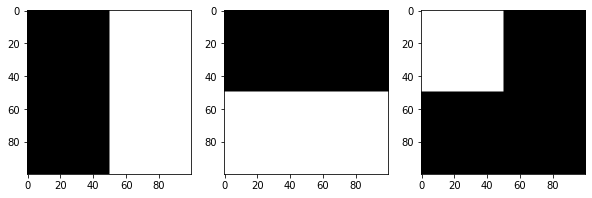

*   Visualize the created images in a 1 x 3 subplot using matplotlib.

Rows correspond to the vertical axis (y-axis).
Columns correspond to the horizontal axis (x-axis).


In [5]:
# solution
# Create the first image: Left half black, right half white. 255 is white
image1 = np.ones((100, 100)) * 255
image1[:, :50] = 0

# Create the second image: Top half black, bottom half white. 255 is white
image2 = np.ones((100, 100)) * 255
image2[:50, :] = 0

# Create the third image: Top left quadrant white, the rest black. 0 is black
image3 = np.zeros((100, 100))
image3[:50, :50] = 255


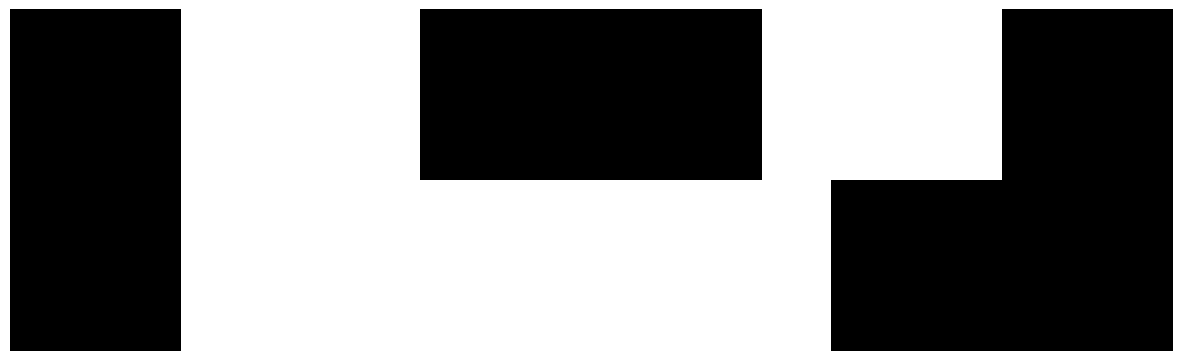

In [6]:
# Visualize the images in a 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image1, cmap='gray')
axs[0].axis('off')

axs[1].imshow(image2, cmap='gray')
axs[1].axis('off')

axs[2].imshow(image3, cmap='gray')
axs[2].axis('off')

plt.show()

*   Use the above three images to create the following image

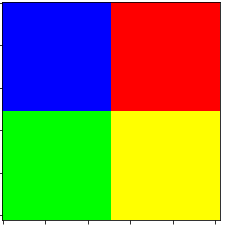
*Hint: Remember channels and color spaces*

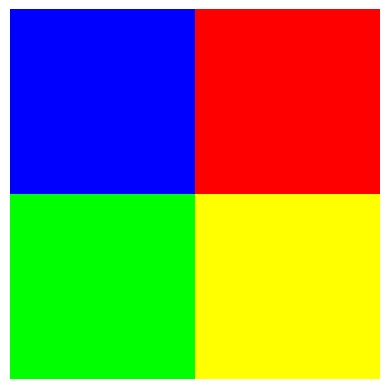

In [7]:
# solution

# Create an empty 100x100x3 image (3 for RGB channels)
image = np.zeros((100, 100, 3), dtype=np.uint8)

# Set colors for each quadrant
# Top left quadrant (blue)
image[:50, :50] = [0, 0, 255]

# Top right quadrant (red)
image[:50, 50:] = [255, 0, 0]

# Bottom left quadrant (green)
image[50:, :50] = [0, 255, 0]

# Bottom right quadrant (yellow)
image[50:, 50:] = [255, 255, 0]

# Visualize the created image
plt.imshow(image)
plt.axis('off')
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

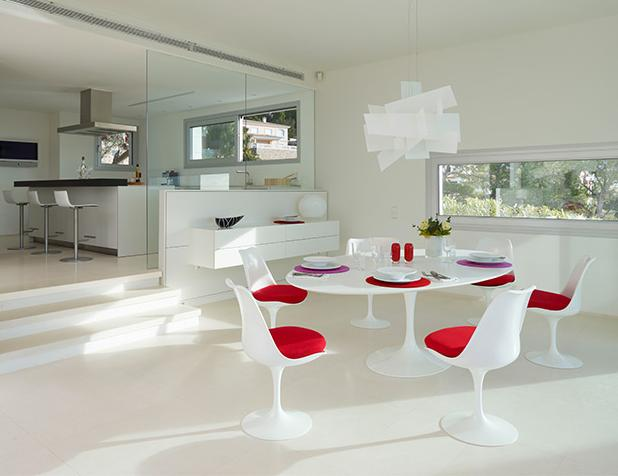

*   Extract individual channels and plot them using matplotlib subplot.



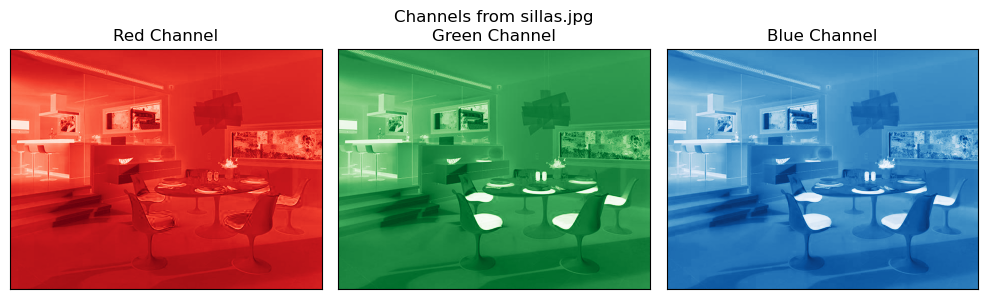

In [10]:
# solution
import matplotlib.pyplot as plt
from PIL import Image


def extract_and_plot_channels(filename):
  """
  Extracts the red, green, and blue channels from an image and plots them as subplots.

  Args:
    filename: The path to the image file.
  """
  # Load the image
  img = Image.open("C:\\Users\\Francesco Corda\\Documents\\GitHub\\labs-cv\\1. lab-computer-vision\\images\\sillas.jpg")

  # Get the image dimensions
  rows, cols = img.size

  # Extract the red, green, and blue channels
  r, g, b = img.split()

  # Create a figure with 3 subplots
  fig, axs = plt.subplots(1, 3, figsize=(10, 3))

  # Plot the red channel in the first subplot
  axs[0].imshow(r, cmap="Reds")
  axs[0].set_title("Red Channel")
  axs[0].set_xticks([])
  axs[0].set_yticks([])

  # Plot the green channel in the second subplot
  axs[1].imshow(g, cmap="Greens")
  axs[1].set_title("Green Channel")
  axs[1].set_xticks([])
  axs[1].set_yticks([])

  # Plot the blue channel in the third subplot
  axs[2].imshow(b, cmap="Blues")
  axs[2].set_title("Blue Channel")
  axs[2].set_xticks([])
  axs[2].set_yticks([])

  # Adjust layout
  fig.suptitle(f"Channels from {filename}")
  plt.tight_layout()

  # Show the plot
  plt.show()


# Replace 'sillas.jpg' with the path to your image file
extract_and_plot_channels("sillas.jpg")


*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

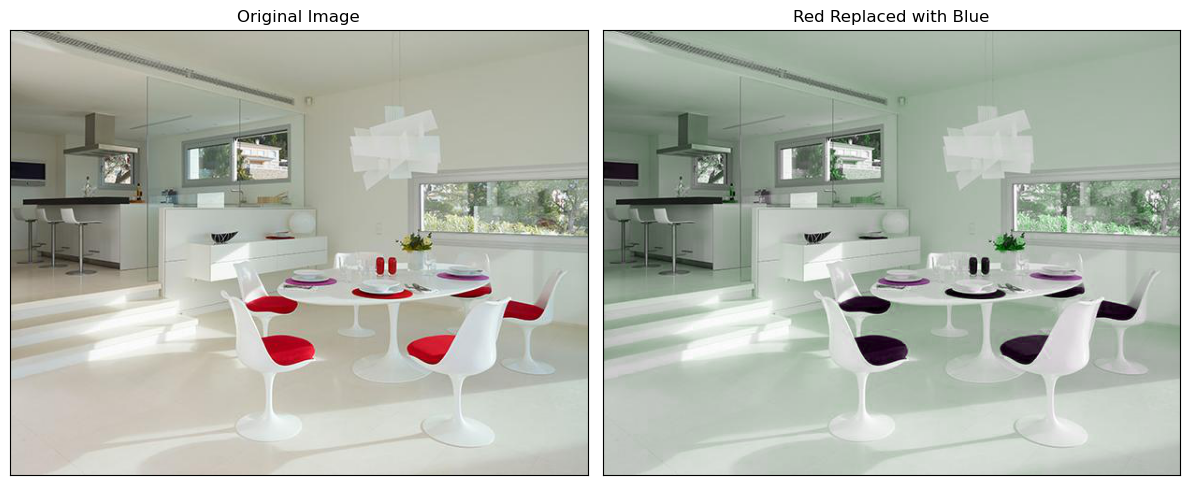

In [11]:
# solution

import matplotlib.pyplot as plt
from PIL import Image

def extract_and_plot_channels(filename):
    """
    Extracts the red, green, and blue channels from an image and plots them as subplots.

    Args:
        filename: The path to the image file.
    """
    # Load the image
    img = Image.open("C:\\Users\\Francesco Corda\\Documents\\GitHub\\labs-cv\\1. lab-computer-vision\\images\\sillas.jpg")

    # Extract the red, green, and blue channels
    r, g, b = img.split()

    # Create a new image with the red channel replaced by the blue channel
    new_img = Image.merge("RGB", (b, g, b))

    # Create a figure with 2 subplots: original image and modified image
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the original image in the first subplot
    axs[0].imshow(img)
    axs[0].set_title("Original Image")
    axs[0].set_xticks([])
    axs[0].set_yticks([])

    # Plot the new image in the second subplot
    axs[1].imshow(new_img)
    axs[1].set_title("Red Replaced with Blue")
    axs[1].set_xticks([])
    axs[1].set_yticks([])

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Replace 'sillas.jpg' with the path to your image file
extract_and_plot_channels("sillas.jpg")


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

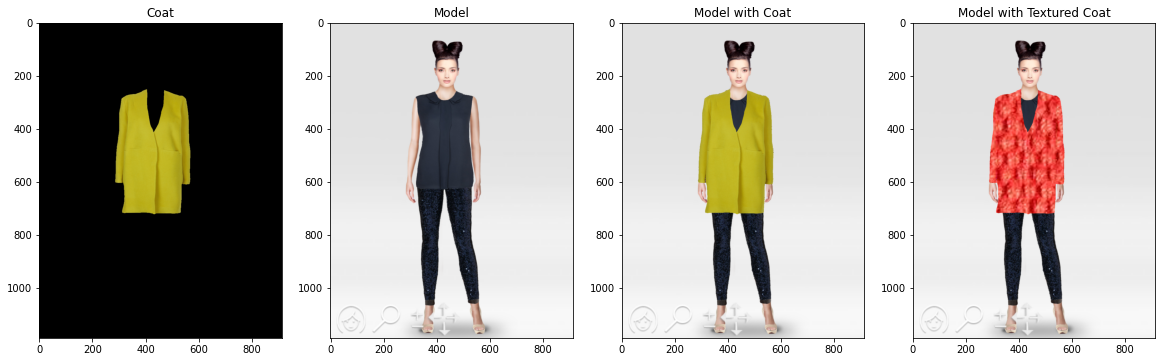

In [14]:
# solution
import matplotlib.pyplot as plt
from PIL import Image

def overlay_coat_on_model(model_path, coat_path):
    """
    Overlays the coat onto the model image using a mask.

    Args:
        model_path: Path to the model image file.
        coat_path: Path to the coat image file.
    """
    # Load images
    model_img = Image.open("C:\\Users\\Francesco Corda\\Documents\\GitHub\\labs-cv\\1. lab-computer-vision\\images\\model.png").convert("RGBA")
    coat_img = Image.open("C:\\Users\\Francesco Corda\\Documents\\GitHub\\labs-cv\\1. lab-computer-vision\\images\\coat.png").convert("RGBA")

    # Create a mask using the alpha channel of the coat image
    coat_mask = coat_img.split()[-1]

    # Composite the coat onto the model using the mask
    model_with_coat = Image.composite(coat_img, model_img, coat_mask)

    return model_with_coat

def change_coat_texture(coat_img, texture_path):
    """
    Changes the coat's texture.

    Args:
        coat_img: The coat image.
        texture_path: Path to the texture image file.
    """
    # Load the texture image
    texture_img = Image.open("C:\\Users\\Francesco Corda\\Documents\\GitHub\\labs-cv\\1. lab-computer-vision\\images\\texture.png").convert("RGBA")

    # Resize texture to match coat image size
    texture_img = texture_img.resize(coat_img.size)

    # Create a mask using the alpha channel of the coat image
    coat_mask = coat_img.split()[-1]

    # Apply the texture to the coat area using the mask
    textured_coat = Image.composite(texture_img, coat_img, coat_mask)

    return textured_coat

def visualize_images(model_img, coat_img, final_img):
    """
    Visualizes the original images and the final manipulated image.

    Args:
        model_img: The model image.
        coat_img: The coat image.
        final_img: The final manipulated image with the textured coat.
    """
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot the model image in the first subplot
    axs[0].imshow(model_img)
    axs[0].set_title("Model Image")
    axs[0].set_xticks([])
    axs[0].set_yticks([])

    # Plot the coat image in the second subplot
    axs[1].imshow(coat_img)
    axs[1].set_title("Coat Image")
    axs[1].set_xticks([])
    axs[1].set_yticks([])

    # Plot the final image in the third subplot
    axs[2].imshow(final_img)
    axs[2].set_title("Model with Textured Coat")
    axs[2].set_xticks([])
    axs[2].set_yticks([])

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Paths to the images
model_path = "C:\\Users\\Francesco Corda\\Documents\\GitHub\\labs-cv\\1. lab-computer-vision\\images\\model.png"
coat_path = "C:\\Users\\Francesco Corda\\Documents\\GitHub\\labs-cv\\1. lab-computer-vision\\images\\coat.png"
texture_path = "C:\\Users\\Francesco Corda\\Documents\\GitHub\\labs-cv\\1. lab-computer-vision\\images\\texture.png" # Replace with actual texture image path

# Overlay the coat onto the model
model_with_coat = overlay_coat_on_model(model_path, coat_path)

# Change the coat's texture
textured_coat = change_coat_texture(model_with_coat, texture_path)

# Visualize the images
visualize_images




<function __main__.visualize_images(model_img, coat_img, final_img)>

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




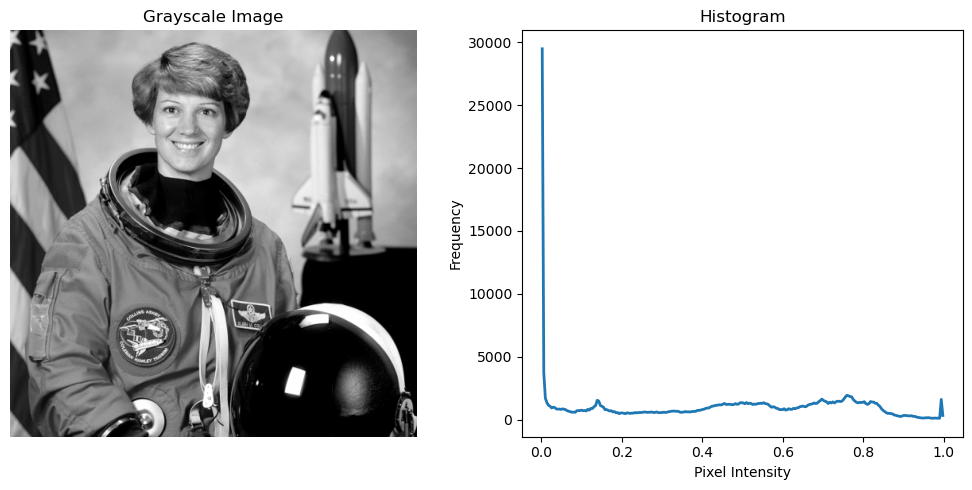

In [15]:
# solution
import matplotlib.pyplot as plt
from skimage import data, color, exposure

# Step 1: Read the astronaut image
astronaut_img = data.astronaut()

# Step 2: Convert the image to grayscale
gray_img = color.rgb2gray(astronaut_img)

# Step 3: Compute the histogram of the grayscale image
hist, hist_centers = exposure.histogram(gray_img)

# Step 4: Plot the histogram using matplotlib
plt.figure(figsize=(10, 5))

# Plot the grayscale image
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Plot the histogram
plt.subplot(1, 2, 2)
plt.plot(hist_centers, hist, lw=2)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()




*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

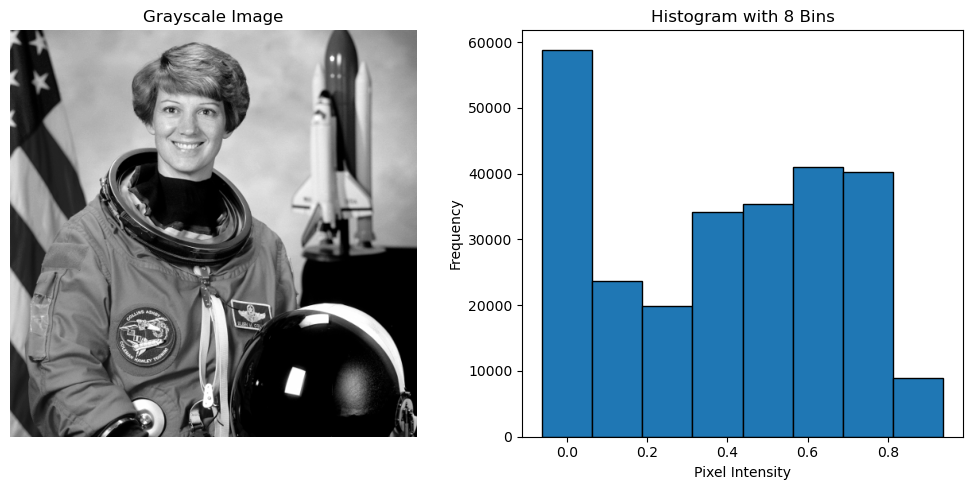

In [16]:
# solution


# Step 1: Read the astronaut image
astronaut_img = data.astronaut()

# Step 2: Convert the image to grayscale
gray_img = color.rgb2gray(astronaut_img)

# Step 3: Compute the histogram of the grayscale image with 8 bins
hist, bin_edges = np.histogram(gray_img, bins=8, range=(0, 1))

# Step 4: Plot the histogram using matplotlib
plt.figure(figsize=(10, 5))

# Plot the grayscale image
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Plot the histogram
plt.subplot(1, 2, 2)
plt.bar(bin_edges[:-1], hist, width=(bin_edges[1] - bin_edges[0]), edgecolor='black')
plt.title('Histogram with 8 Bins')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


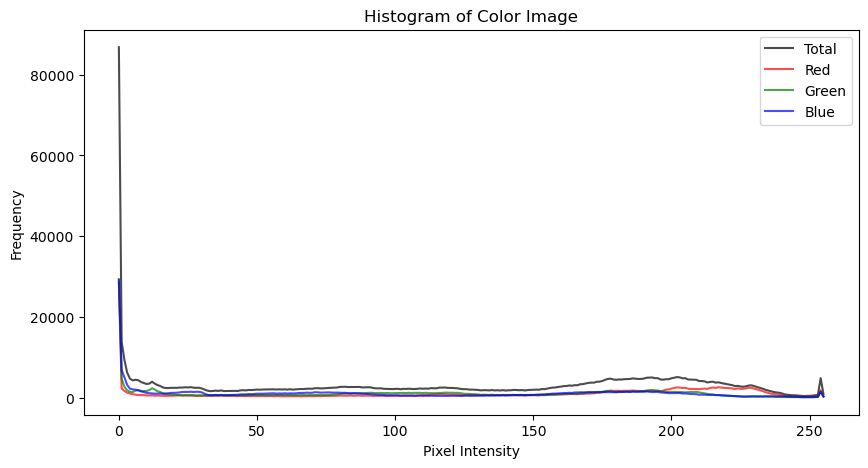

In [17]:
#solution
# Step 2: Compute the histogram of the color image for each channel
hist_r, bin_edges_r = np.histogram(astronaut_img[:,:,0].ravel(), bins=256, range=(0, 256))
hist_g, bin_edges_g = np.histogram(astronaut_img[:,:,1].ravel(), bins=256, range=(0, 256))
hist_b, bin_edges_b = np.histogram(astronaut_img[:,:,2].ravel(), bins=256, range=(0, 256))

# Step 3: Compute the total histogram by summing histograms of all color channels
total_hist = hist_r + hist_g + hist_b

# Step 4: Plot the total histogram and individual histograms for each channel
plt.figure(figsize=(10, 5))

# Plot total histogram
plt.plot(bin_edges_r[:-1], total_hist, color='black', label='Total', alpha=0.7)

# Plot histograms for each channel with different colors and labels
plt.plot(bin_edges_r[:-1], hist_r, color='red', label='Red', alpha=0.7)
plt.plot(bin_edges_g[:-1], hist_g, color='green', label='Green', alpha=0.7)
plt.plot(bin_edges_b[:-1], hist_b, color='blue', label='Blue', alpha=0.7)

# Add labels, title, and legend
plt.title('Histogram of Color Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



c:\Users\Francesco Corda\Documents\Aline\Lib\site-packages\skimage\_shared\utils.py:326: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


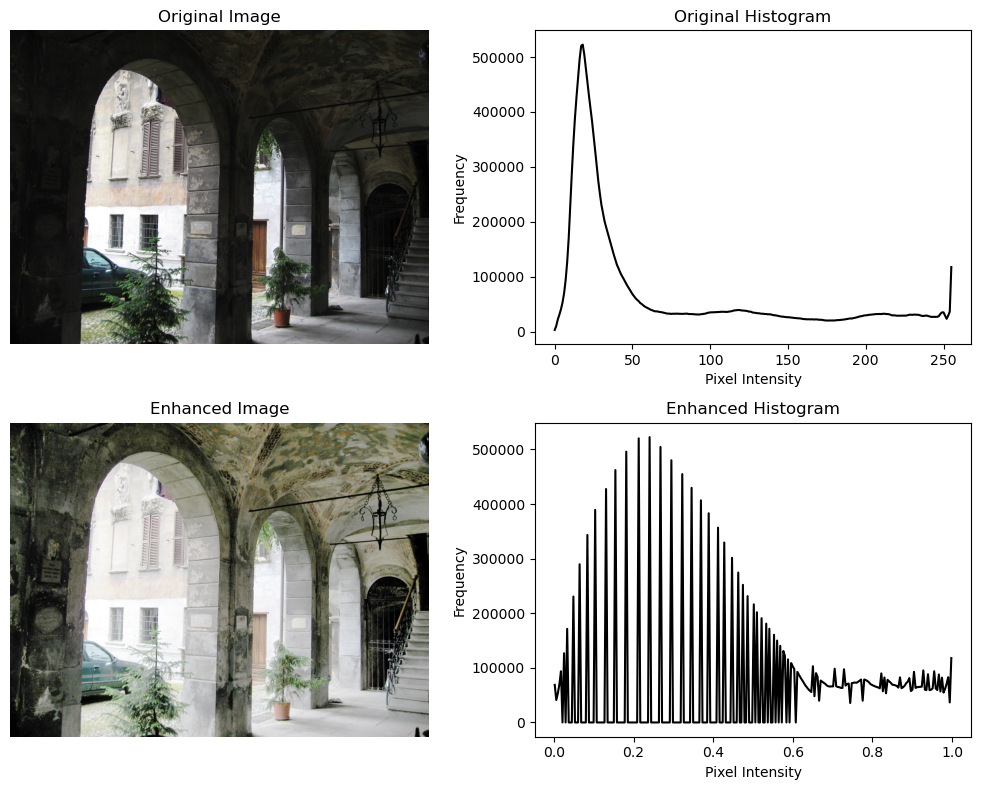

In [18]:
# solution
from skimage import io, exposure

# Step 1: Read the image
image_path = 'images/aquatermi_lowcontrast.jpg'
original_image = io.imread(image_path)

# Step 2: Compute histogram of the original image
original_hist, original_bins = exposure.histogram(original_image)

# Step 3: Perform histogram equalization
equalized_image = exposure.equalize_hist(original_image)

# Step 4: Compute histogram of the equalized image
equalized_hist, equalized_bins = exposure.histogram(equalized_image)

# Step 5: Visualize the results using subplots
plt.figure(figsize=(10, 8))

# Plot original image and its histogram
plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(original_bins, original_hist, color='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot equalized image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.plot(equalized_bins, equalized_hist, color='black')
plt.title('Enhanced Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



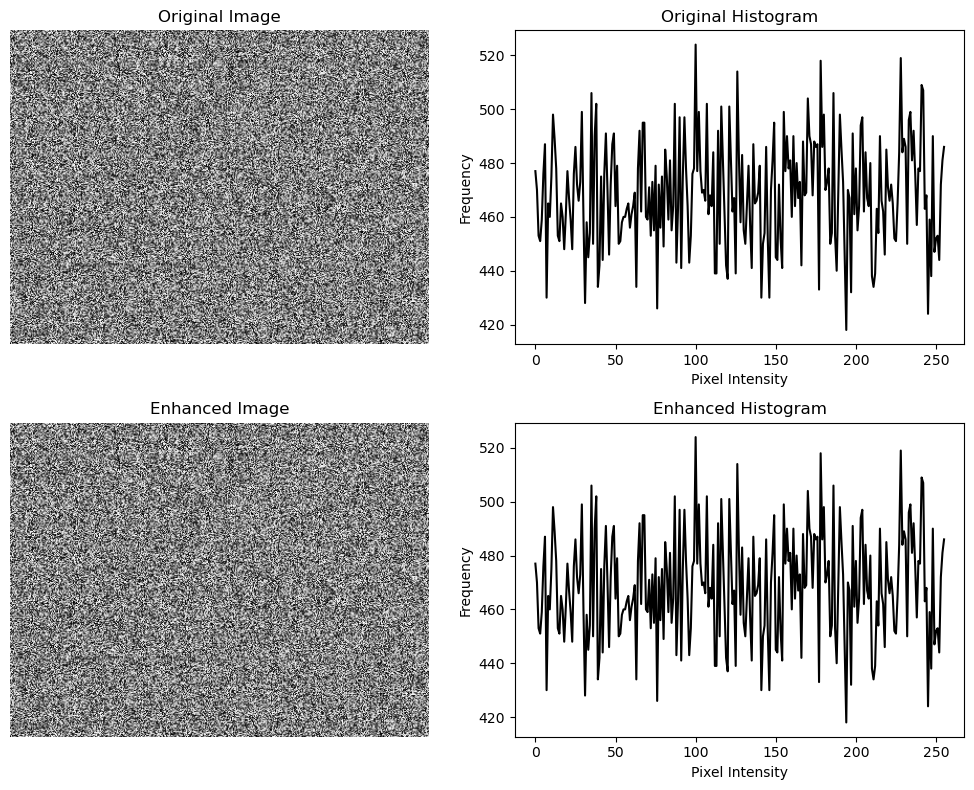

In [20]:

def linear_contrast_stretch(image, bins):
    # Step 1: Compute histogram
    hist, bin_edges = np.histogram(image.flatten(), bins=bins, range=(0, 256))

    # Step 2: Compute cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Step 3: Find minimum and maximum intensity values
    min_intensity = np.min(image)
    max_intensity = np.max(image)

    # Step 4: Linearly scale intensity values
    enhanced_image = ((image - min_intensity) / (max_intensity - min_intensity)) * 255

    # Step 5: Compute histogram of enhanced image
    enhanced_hist, _ = np.histogram(enhanced_image.flatten(), bins=bins, range=(0, 256))

    return enhanced_image, hist, enhanced_hist

def visualize_linear_contrast_stretch(image, bins=256):
    # Step 1: Compute enhanced image, original histogram, and enhanced histogram
    enhanced_image, original_hist, enhanced_hist = linear_contrast_stretch(image, bins)

    # Step 2: Visualize the results using subplots
    plt.figure(figsize=(10, 8))

    # Plot original image and its histogram
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.plot(np.arange(bins), original_hist, color='black')
    plt.title('Original Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Plot enhanced image and its histogram
    plt.subplot(2, 2, 3)
    plt.imshow(enhanced_image.astype(np.uint8), cmap='gray')
    plt.title('Enhanced Image')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.plot(np.arange(bins), enhanced_hist, color='black')
    plt.title('Enhanced Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Test with a grayscale image
# Generate a random grayscale image for testing
np.random.seed(0)
grayscale_image = np.random.randint(0, 256, size=(300, 400))

# Visualize linear contrast stretch for the generated grayscale image
visualize_linear_contrast_stretch(grayscale_image, bins=256)

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




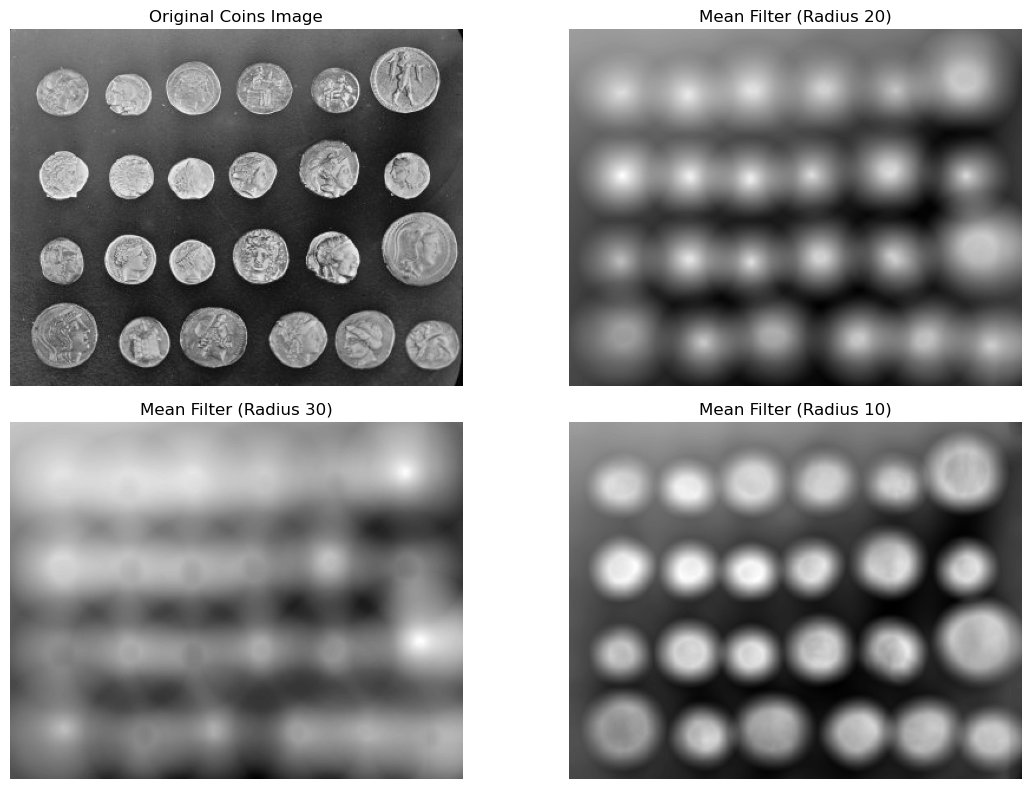

In [21]:
# solution

import matplotlib.pyplot as plt
from skimage import data, morphology, filters, util

# Step 1: Load the Coins Image
coins_image = data.coins()

# Step 2: Define a Disk Structuring Element (selem) of Radius 20
radius = 20
selem = morphology.disk(radius)

# Step 3: Apply Mean Filter with Radius 20
mean_filtered_20 = filters.rank.mean(util.img_as_ubyte(coins_image), selem)

# Step 4: Increase the Radius of the Structuring Element by 10 and Apply Mean Filter
radius += 10
selem = morphology.disk(radius)
mean_filtered_30 = filters.rank.mean(util.img_as_ubyte(coins_image), selem)

# Step 5: Reduce the Radius of the Structuring Element by 10 and Apply Mean Filter
radius -= 20
selem = morphology.disk(radius)
mean_filtered_10 = filters.rank.mean(util.img_as_ubyte(coins_image), selem)

# Step 6: Visualize the Results
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(coins_image, cmap='gray')
plt.title('Original Coins Image')
plt.axis('off')

# Mean Filter with Radius 20
plt.subplot(2, 2, 2)
plt.imshow(mean_filtered_20, cmap='gray')
plt.title('Mean Filter (Radius 20)')
plt.axis('off')

# Mean Filter with Radius 30
plt.subplot(2, 2, 3)
plt.imshow(mean_filtered_30, cmap='gray')
plt.title('Mean Filter (Radius 30)')
plt.axis('off')

# Mean Filter with Radius 10
plt.subplot(2, 2, 4)
plt.imshow(mean_filtered_10, cmap='gray')
plt.title('Mean Filter (Radius 10)')
plt.axis('off')

plt.tight_layout()
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

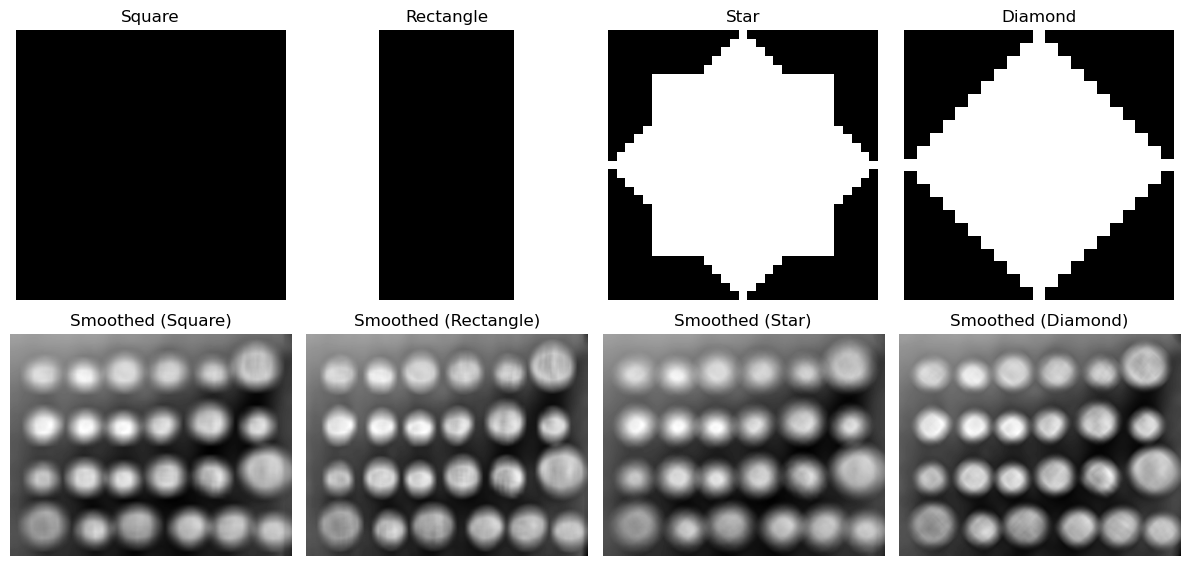

In [22]:
# solution
import matplotlib.pyplot as plt
from skimage import data, morphology, filters, util

# Step 1: Load the Coins Image
coins_image = data.coins()

# Different structuring elements
selems = [
    morphology.square(20),  # Square structuring element
    morphology.rectangle(20, 10),  # Rectangle structuring element
    morphology.star(10),  # Star structuring element
    morphology.diamond(10)  # Diamond structuring element
]

# Corresponding labels for structuring elements
selem_labels = ['Square', 'Rectangle', 'Star', 'Diamond']

# Smoothened images list
smoothed_images = []

# Apply mean filter for each structuring element
for selem in selems:
    smoothed_image = filters.rank.mean(util.img_as_ubyte(coins_image), selem)
    smoothed_images.append(smoothed_image)

# Visualize the results
num_selems = len(selems)
num_cols = num_selems

plt.figure(figsize=(12, 6))

for i in range(num_selems):
    # Plot structuring element
    plt.subplot(2, num_cols, i + 1)
    plt.imshow(selems[i], cmap='gray')
    plt.title(selem_labels[i])
    plt.axis('off')

    # Plot corresponding smoothed image
    plt.subplot(2, num_cols, num_cols + i + 1)
    plt.imshow(smoothed_images[i], cmap='gray')
    plt.title(f'Smoothed ({selem_labels[i]})')
    plt.axis('off')

plt.tight_layout()
plt.show()



*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*

...